In [163]:
import pandas as pd
import seaborn as sns
import mysql.connector
import numpy as np

In [147]:
config = {
  'host':'elecsimresults.mysql.database.azure.com',
  'user':'alexkell@elecsimresults',
  'password':'b3rz0s4m4dr1dth3h01113s!',
  'database':'elecsim',
  'ssl_ca':'/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/run/validation-optimisation/database/BaltimoreCyberTrustRoot.crt.pem'
}

conn = mysql.connector.connect(**config)

In [187]:
electricity_mix = pd.read_csv("/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/elecsim/data/processed/electricity_mix/energy_mix_historical.csv")

,Unnamed: 0,year,variable,value
2,2,2013,coal,14355.798134
7,7,2018,coal,1753.406904
11,11,2013,nuclear,7526.513864
16,16,2018,nuclear,6924.267173
20,20,2013,ccgt,9135.930888
25,25,2018,ccgt,13180.123033
29,29,2013,wind,2127.126709
34,34,2018,wind,4500.075723
38,38,2013,hydro,332.950624
43,43,2018,hydro,365.992504


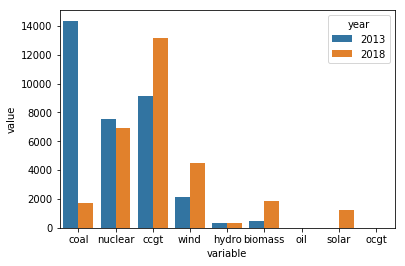

In [190]:
electricity_mix_2013_18 = electricity_mix[electricity_mix.year.isin([2013, 2018])]
sns.barplot(data=electricity_mix_2013_18, x='variable', hue='year', y='value')

In [148]:
actual_mix_2018 = electricity_mix[electricity_mix.year == 2018]
actual_mix_2018

,Unnamed: 0,year,variable,value
7,7,2018,coal,1753.406904
16,16,2018,nuclear,6924.267173
25,25,2018,ccgt,13180.123033
34,34,2018,wind,4500.075723
43,43,2018,hydro,365.992504
52,52,2018,biomass,1839.515745
61,61,2018,oil,0.004401
70,70,2018,solar,1244.565825
79,79,2018,ocgt,2.096373


In [149]:
ga_results = pd.read_sql('SELECT * FROM validoptimresults', con=conn)
ga_results.head()

,id,run_number,time_taken,reward,individual_m,individual_c,coal,nuclear,ccgt,wind,solar
0,1,1,2989.208274,0.789698,0.003070,3.226980,8505.134048,6262.546219,3700.060521,1571.824539,0.000000
1,2,1,5513.352680,0.890754,0.003107,7.246419,8665.486372,6246.358472,3623.389726,1295.116081,269.738108
2,3,1,9399.210517,0.845091,0.000533,4.162403,5587.521855,5295.844523,1430.174301,8471.586111,11.691435
3,4,1,3712.673850,0.854998,0.003411,-87.242372,8571.597217,6108.836677,3315.109397,1062.438904,1199.498042
4,5,1,3853.693181,0.906513,0.002099,32.117105,8692.136247,6244.689345,3629.989945,1103.436984,415.045943


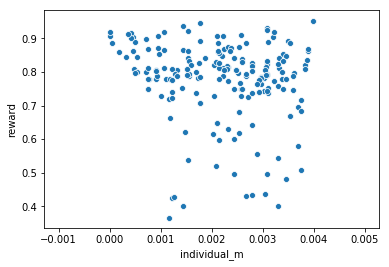

In [150]:
sns.scatterplot(data=ga_results, x='individual_m', y='reward')

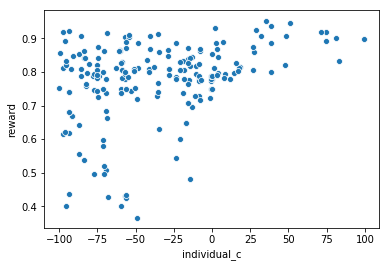

In [151]:
sns.scatterplot(data=ga_results, x='individual_c', y='reward')

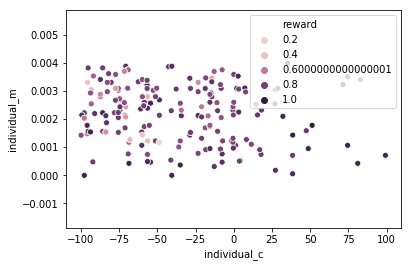

In [152]:
sns.scatterplot(data=ga_results, x='individual_c', y='individual_m', hue='reward')

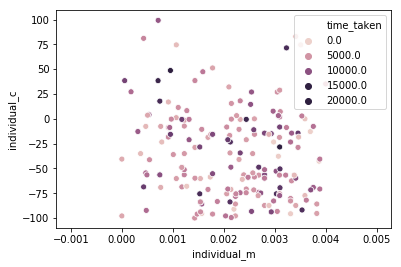

In [171]:
sns.scatterplot(data=ga_results, x='individual_m', y='individual_c', hue='time_taken')

In [169]:
ga_results.sort_values(['reward', 'individual_c'])

,id,run_number,time_taken,reward,individual_m,individual_c,coal,nuclear,ccgt,wind,solar
159,160,1,4477.756859,0.366622,0.001175,-48.874429,8173.778694,6256.718576,5419.528603,1197.985030,414.210840
140,141,1,4878.463010,0.400577,0.001433,-59.763441,7523.188089,6007.069019,2653.607589,3920.989890,237.169110
63,64,1,1406.962850,0.400860,0.003308,-95.579124,9139.609064,6360.166805,3424.067753,1121.902956,0.000000
97,98,1,6205.853785,0.424973,0.001224,-56.352014,8636.945831,6133.446299,3334.505945,1918.736161,182.052345
111,112,1,1755.437033,0.426981,0.001272,-67.903306,9200.735812,6355.131485,3397.286384,1121.937458,0.000000
65,66,1,4728.375021,0.429776,0.002685,-56.670573,7510.875210,6177.695521,5892.655671,1263.803875,697.800428
133,134,1,10659.703881,0.432626,0.002799,-56.352014,5900.805719,5480.185708,1738.250795,7253.618707,32.568998
41,42,1,5801.892607,0.437072,0.003048,-93.199804,8968.596747,6296.617093,5287.143315,1357.034083,116.079248
42,43,1,12155.300563,0.481659,0.003455,-14.377406,8036.300571,6185.798987,3755.952575,2270.163521,50.106150
75,76,1,5001.251118,0.496141,0.002440,-70.657775,7580.040057,6295.791954,7042.420164,1132.921232,226.312778


In [153]:
ga_results_long = pd.melt(ga_results, id_vars=['id', 'run_number', 'time_taken', 'individual_m', 'individual_c'], value_vars=['reward', 'coal','nuclear','ccgt','wind','solar'])
ga_results_long.head()

,id,run_number,time_taken,individual_m,individual_c,variable,value
0,1,1,2989.208274,0.003070,3.226980,reward,0.789698
1,2,1,5513.352680,0.003107,7.246419,reward,0.890754
2,3,1,9399.210517,0.000533,4.162403,reward,0.845091
3,4,1,3712.673850,0.003411,-87.242372,reward,0.854998
4,5,1,3853.693181,0.002099,32.117105,reward,0.906513


In [172]:
best_result = ga_results.iloc[ga_results['reward'].argmin()]
best_result = ga_results.iloc[42]
best_result

/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  """Entry point for launching an IPython kernel.


id                 43.000000
run_number          1.000000
time_taken      12155.300563
reward              0.481659
individual_m        0.003455
individual_c      -14.377406
coal             8036.300571
nuclear          6185.798987
ccgt             3755.952575
wind             2270.163521
solar              50.106150
Name: 42, dtype: float64

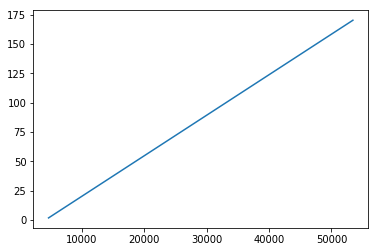

In [173]:
X_line = np.array(np.arange(4636.765716,53469.780720, 100))
Y_line = X_line * best_result.individual_m + best_result.individual_c
sns.lineplot(X_line, Y_line)

In [174]:
actual_mix_2018['data_type'] = 'actual'
# actual_mix_2018 = actual_mix_2018.rename(columns={'value': 'value-actual'})
actual_mix_2018

/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,year,variable,value,data_type
7,7,2018,coal,1753.406904,actual
16,16,2018,nuclear,6924.267173,actual
25,25,2018,ccgt,13180.123033,actual
34,34,2018,wind,4500.075723,actual
43,43,2018,hydro,365.992504,actual
52,52,2018,biomass,1839.515745,actual
61,61,2018,oil,0.004401,actual
70,70,2018,solar,1244.565825,actual
79,79,2018,ocgt,2.096373,actual


In [175]:
best_result_df = best_result.to_frame().reset_index()
best_result_df.columns = ['variable','value']
best_result_df['data_type'] = 'predicted'
best_result_df

,variable,value,data_type
0,id,43.000000,predicted
1,run_number,1.000000,predicted
2,time_taken,12155.300563,predicted
3,reward,0.481659,predicted
4,individual_m,0.003455,predicted
5,individual_c,-14.377406,predicted
6,coal,8036.300571,predicted
7,nuclear,6185.798987,predicted
8,ccgt,3755.952575,predicted
9,wind,2270.163521,predicted


In [178]:
comparison = actual_mix_2018.merge(best_result_df, on=['variable'])

In [180]:
best_actual = actual_mix_2018[['variable', 'value', 'data_type']].append(best_result_df)
best_actual

,variable,value,data_type
7,coal,1753.406904,actual
16,nuclear,6924.267173,actual
25,ccgt,13180.123033,actual
34,wind,4500.075723,actual
43,hydro,365.992504,actual
52,biomass,1839.515745,actual
61,oil,0.004401,actual
70,solar,1244.565825,actual
79,ocgt,2.096373,actual
0,id,43.000000,predicted


In [181]:
best_actual_res = best_actual[best_actual['variable'].isin(['ccgt','nuclear','wind','solar','coal'])]
best_actual_res

,variable,value,data_type
7,coal,1753.406904,actual
16,nuclear,6924.267173,actual
25,ccgt,13180.123033,actual
34,wind,4500.075723,actual
70,solar,1244.565825,actual
6,coal,8036.300571,predicted
7,nuclear,6185.798987,predicted
8,ccgt,3755.952575,predicted
9,wind,2270.163521,predicted
10,solar,50.106150,predicted


In [182]:
best_actual_res['mix_perc'] = best_actual_res.groupby("data_type")['value'].apply(lambda x: x/x.sum())
best_actual_res

/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,variable,value,data_type,mix_perc
7,coal,1753.406904,actual,0.063524
16,nuclear,6924.267173,actual,0.250857
25,ccgt,13180.123033,actual,0.477498
34,wind,4500.075723,actual,0.163032
70,solar,1244.565825,actual,0.045089
6,coal,8036.300571,predicted,0.395910
7,nuclear,6185.798987,predicted,0.304744
8,ccgt,3755.952575,predicted,0.185038
9,wind,2270.163521,predicted,0.111840
10,solar,50.106150,predicted,0.002468


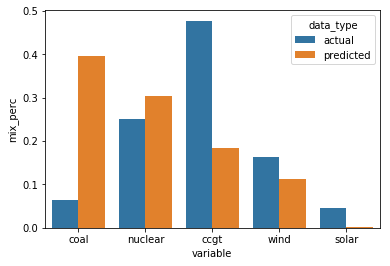

In [183]:
sns.barplot(data=best_actual_res, x='variable', y='mix_perc', hue='data_type')